# Understanding Document Clustering

Clustering is one of the most important Unsupervised Machine Learning Techniques. These algorithms come in handy, especially in situations where __labelled data is a luxury__. Clustering techniques help us understand the underlying patterns in data (more so around them being similar) along with the ability to bootstrap certain supervised learning approaches as well.

![](avengers.jpg)

Clustering techniques have been studied in depth over the years and there are some very powerful clustering algorithms available. For this tutorial, we will be working with a movie dataset containing movie plot, cast, genres and related other information. We will be working with __K-Means__ and __Ward-Hierarchical-Clustering__ methods.

# Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('tmdb_5000_movies.csv.gz', 
                 compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [2]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [4]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


## Your Turn: Cluster Similar Movies

Here you will learn how to cluster text documents (in this case movies). We will use the following pipeline:
- Text pre-processing
- Feature Engineering
- Clustering Using K-Means
- Finding Optimal Value for K
- Prepare Movie Clusters

Clustering is an unsupervised approach to find groups of similar items in any given dataset. There are different clustering algorithms and __K-Means__ is a pretty simple yet affect one. Most movies span different emotions and can be categorized into multiple genres (same is the case with movies listed in our current dataset). Can clustering of movie descriptions help us understand these groupings?

Similarity analysis (in the previous section) was a good starting point, but can we do better? 

## Text pre-processing

We will do some basic text pre-processing on our movie descriptions before we build our features

In [5]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

## Extract TF-IDF Features

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

# extract bag of words count based features for unigrams and bigrams such that each feature occurs in at least 10 documents and
# at most 80% of the documents using the terms min_df and max_df.

(4800, 3012)

## Cluster Movies using K-Means
The one main disadvantage of this algorithm is that the number of clusters (k) needs to be specified in advance, as it is with all centroid-based clustering models. The most popular clustering algorithm, due to its ease of use as well
as it being scalable with large amounts of data.

In [8]:
# Scikit-Learn,
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
# viewing distribution of movies across the clusters
from collections import Counter

Counter(km.labels_)

Counter({2: 509, 5: 2729, 4: 512, 1: 662, 0: 387, 3: 1})

In [13]:
df['kmeans_cluster'] = km.labels_

In [14]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [15]:
feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['family', 'life', 'home', 'young', 'father', 'new', 'man', 'lives', 'back', 'story', 'finds', 'son', 'friends', 'find', 'help']
Popular Movies: ['Frozen', 'The Godfather', 'The Godfather: Part II', 'Furious 7', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'Gladiator', 'Birdman', 'Prisoners', 'American Sniper', 'The Hunger Games: Catching Fire', 'Run All Night', 'The Grand Budapest Hotel', 'Aliens', 'Southpaw', 'Dracula Untold', 'The Croods', 'GoodFellas', 'Warcraft', 'Hotel Transylvania 2']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['life', 'love', 'man', 'story', 'young', 'new', 'back', 'time', 'years', 'find', 'woman', 'hes', 'finds', 'way', 'death']
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'Forrest Gump', 'The Shawshank Redemption', 'Harry Potter and the Chamber of Secrets', 'Inside Out', 'Twilight', 'Maleficent', "Harry Potter and the Philosopher's S

We can also use other feature schemes, like pairwise document similarity, to group similar movies in clusters

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({1: 424, 0: 723, 5: 1910, 4: 503, 3: 883, 2: 357})

In [17]:
df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'The Godfather', "Pirates of the Caribbean: At World's End", 'Forrest Gump', 'The Shawshank Redemption', 'Harry Potter and the Chamber of Secrets', 'Inside Out', 'Twilight', 'Maleficent', "Harry Potter and the Philosopher's Stone", 'Bruce Almighty', 'The Hobbit: An Unexpected Journey', 'The Twilight Saga: Eclipse', 'Fifty Shades of Grey', 'Blade Runner', 'Psycho', 'Up', 'The Lion King']
--------------------------------------------------------------------------------
CLUSTER #2
Popular Movies: ['Minions', 'Jurassic World', 'Captain America: Civil War', 'Batman v Superman: Dawn of Justice', 'Avatar', 'The Avengers', 'Fury', 'The Maze Runner', 'Tomorrowland', 'Ant-Man', 'Spirited Away', 'Chappie', 'Monsters, Inc.', "Schindler's List", 'The Matrix', 'Skyfall', 'The Adventures of Tintin', 'Nightcrawler', 'Thor', 'Allegiant']
--------------------------------------------------------------------------------
CLUSTER #3
P

Obviously, we used pairwise document similarity as features, hence we do not have
specific term-based features that we can depict for each cluster as before. However, we
can still see each cluster of similar movies in the preceding output.

The k-means algorithm, while very popular, has the drawback of the user having to define the number of clusters.
# Affinity Propagation
Affinity Propagation (AP) algorithm is based on the concept of "message passing" among the various data points to be clustered and there is no assumption about the number of possible clusters. One drawback of this method is that it is computationally intensive.

In [18]:
from sklearn.cluster import AffinityPropagation # Scikit-Learn

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features) # cosine similarity
res = Counter(ap.labels_)
res.most_common(10)

[(183, 1355),
 (182, 93),
 (159, 80),
 (54, 74),
 (81, 57),
 (16, 51),
 (26, 47),
 (24, 45),
 (48, 43),
 (89, 42)]

In [19]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']]
                  .sort_values(by=['affprop_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #183
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER #182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky

An important point to note here is that a few keywords from the exemplars or
centroids for each cluster may not always depict the true theme of that cluster. A good idea is to build topic models on each cluster and see what kind of topics you can extract from each cluster that would make a better representation of each cluster (another example where you can see how to connect various text analytics techniques).

## Hierarchical Clustering
So far, we were successfull in clustering movies using __K-Means__. But is there any further level of understanding we can extract from this dataset in an unsupervised manner?

Hierarchical Clustering to the rescue. K-Means helped us understand similarities amongst movies, with hierarchical clustering we can aim at understanding abstract or higher level concepts which are common across groups of movies. There are primarily two ways in which hierarchical clustering can be performed:

- Divisive : The algorithm begins with every element in one big generic cluster and then goes on dividing them into specific clusters in a recursive manner.
- Agglomerative : In this case, the algorithm starts by placing every element into a cluster of its own and then goes on merging them into more general clusters in a recursive manner (till they all merge into one big cluster).

For this tutorial, we will work with __Ward clustering algorithm__. Ward clustering is an agglomerative clustering method, i.e. at each stage, the pair of clusters with minimum _between-cluster distance_ (or wcss) are merged. 

To work with Ward Clustering Algorithm, we perform the following steps:
-  Prepare a cosine distance matrix
-  Calculate a linkage_matrix
-  Plot the hierarchical structure as a dendrogram.  

In [20]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

### Calculate Linkage Matrix using Cosine Similarity

In [21]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

### Plot Hierarchical Structure as a Dendrogram

In [28]:
import matplotlib.pyplot as plt

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [29]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

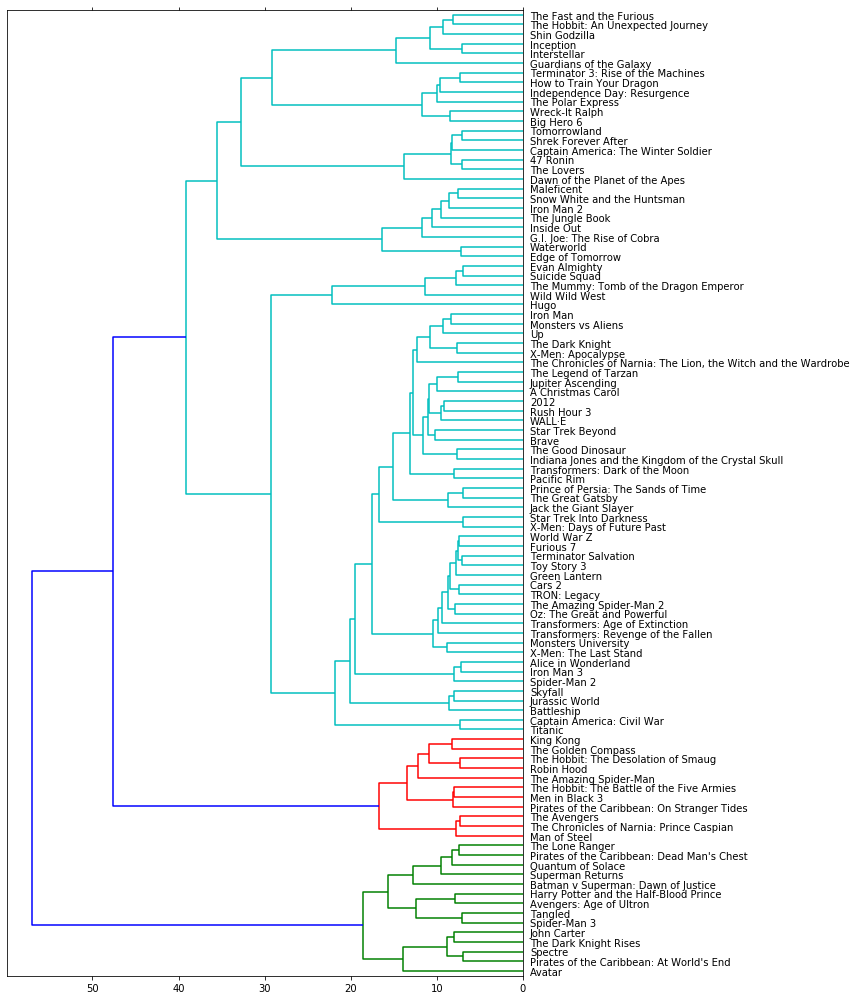

In [30]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))